# Importing Libraries

In [2]:
import pandas as pd

In [13]:
df = pd.read_csv('Metro-Interstate-Traffic-Volume-Encoded.csv')  

In [14]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,7,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545
1,7,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516
2,7,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767
3,7,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026
4,7,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918


# Extracting Year, Month, Day, Hour

In [15]:
# Step 1: Convert to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Step 2: Extract components
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month
df['Day'] = df['date_time'].dt.day
df['Hour'] = df['date_time'].dt.hour

In [16]:
print(df[['Year', 'Month', 'Day', 'Hour']])

       Year  Month  Day  Hour
0      2012     10    2     9
1      2012     10    2    10
2      2012     10    2    11
3      2012     10    2    12
4      2012     10    2    13
...     ...    ...  ...   ...
48199  2018      9   30    19
48200  2018      9   30    20
48201  2018      9   30    21
48202  2018      9   30    22
48203  2018      9   30    23

[48204 rows x 4 columns]


# Adding is_weekend and is_rush_hour flags

In [17]:
# Weekday: Monday = 0, Sunday = 6
df['Weekday'] = df['date_time'].dt.weekday

# Weekend flag
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Rush hour flag (7–9 AM or 4–6 PM)
df['is_rush_hour'] = df['Hour'].apply(lambda h: 1 if (7 <= h <= 9) or (16 <= h <= 18) else 0)

In [18]:
print(df[['date_time', 'Hour', 'Weekday', 'is_weekend', 'is_rush_hour']])

                date_time  Hour  Weekday  is_weekend  is_rush_hour
0     2012-10-02 09:00:00     9        1           0             1
1     2012-10-02 10:00:00    10        1           0             0
2     2012-10-02 11:00:00    11        1           0             0
3     2012-10-02 12:00:00    12        1           0             0
4     2012-10-02 13:00:00    13        1           0             0
...                   ...   ...      ...         ...           ...
48199 2018-09-30 19:00:00    19        6           1             0
48200 2018-09-30 20:00:00    20        6           1             0
48201 2018-09-30 21:00:00    21        6           1             0
48202 2018-09-30 22:00:00    22        6           1             0
48203 2018-09-30 23:00:00    23        6           1             0

[48204 rows x 5 columns]


In [19]:
print(df.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'Year', 'Month',
       'Day', 'Hour', 'Weekday', 'is_weekend', 'is_rush_hour'],
      dtype='object')


In [20]:
print(df.head())

   holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        7  288.28      0.0      0.0          40             1   
1        7  289.36      0.0      0.0          75             1   
2        7  289.58      0.0      0.0          90             1   
3        7  290.13      0.0      0.0          90             1   
4        7  291.14      0.0      0.0          75             1   

   weather_description           date_time  traffic_volume  Year  Month  Day  \
0                   24 2012-10-02 09:00:00            5545  2012     10    2   
1                    2 2012-10-02 10:00:00            4516  2012     10    2   
2                   19 2012-10-02 11:00:00            4767  2012     10    2   
3                   19 2012-10-02 12:00:00            5026  2012     10    2   
4                    2 2012-10-02 13:00:00            4918  2012     10    2   

   Hour  Weekday  is_weekend  is_rush_hour  
0     9        1           0             1  
1    10        1           0    

# Distribution of traffic_volume

In [21]:
print(df['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


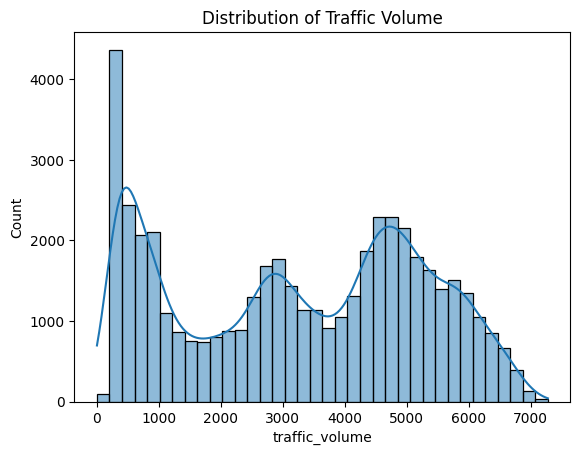

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

# Time Based Trends

<Axes: title={'center': 'Avg Traffic by Hour'}, xlabel='Hour'>

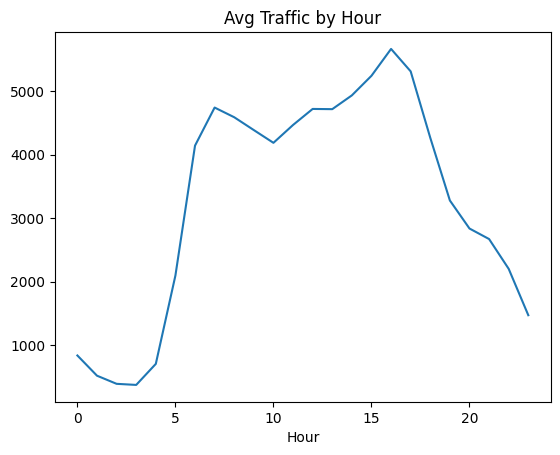

In [23]:
df.groupby('Hour')['traffic_volume'].mean().plot(kind='line', title='Avg Traffic by Hour')

<Axes: title={'center': 'Avg Traffic by Weekday'}, xlabel='Weekday'>

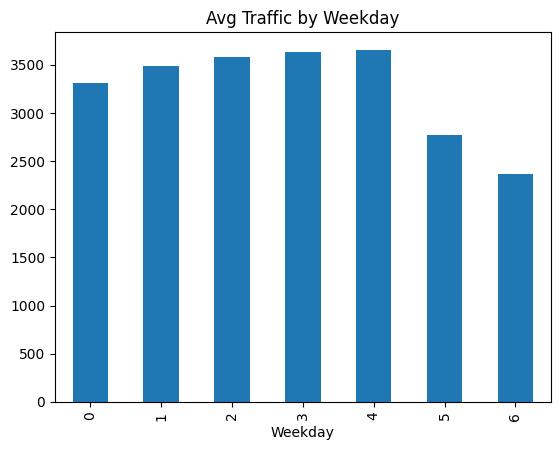

In [24]:
df.groupby('Weekday')['traffic_volume'].mean().plot(kind='bar', title='Avg Traffic by Weekday')

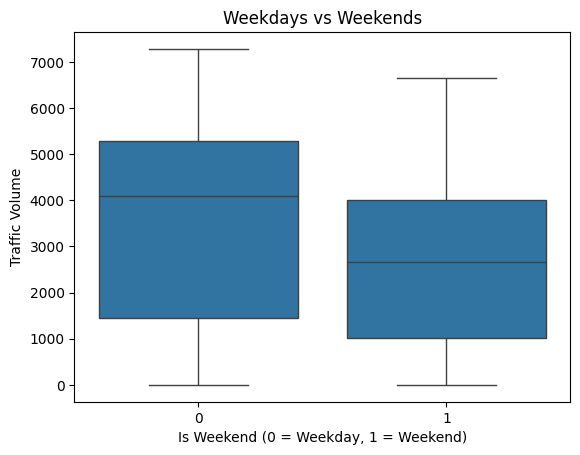

In [27]:
sns.boxplot(x='is_weekend', y='traffic_volume', data=df)
plt.title('Weekdays vs Weekends') 
plt.xlabel('Is Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Traffic Volume')
plt.show()

# Weather Impact

<Axes: xlabel='weather_main', ylabel='traffic_volume'>

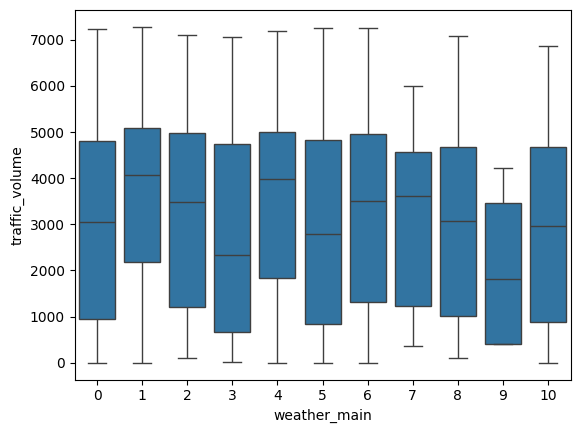

In [28]:
sns.boxplot(x='weather_main', y='traffic_volume', data=df)

# Rush Hour Analysis

<Axes: xlabel='is_rush_hour', ylabel='traffic_volume'>

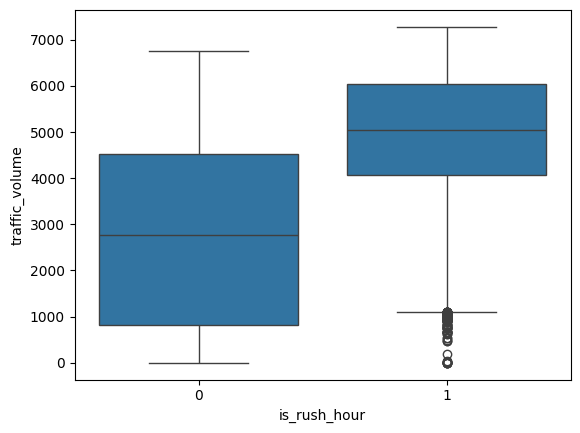

In [29]:
sns.boxplot(x='is_rush_hour', y='traffic_volume', data=df)

Text(0.5, 1.0, 'Traffic Volume Heatmap: Hour vs Weekday')

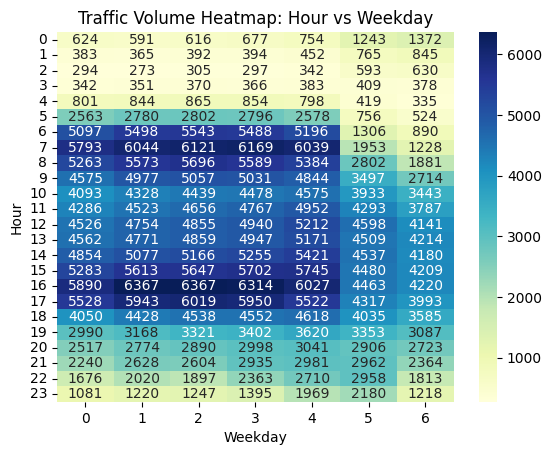

In [30]:
pivot = df.pivot_table(index='Hour', columns='Weekday', values='traffic_volume', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Traffic Volume Heatmap: Hour vs Weekday")

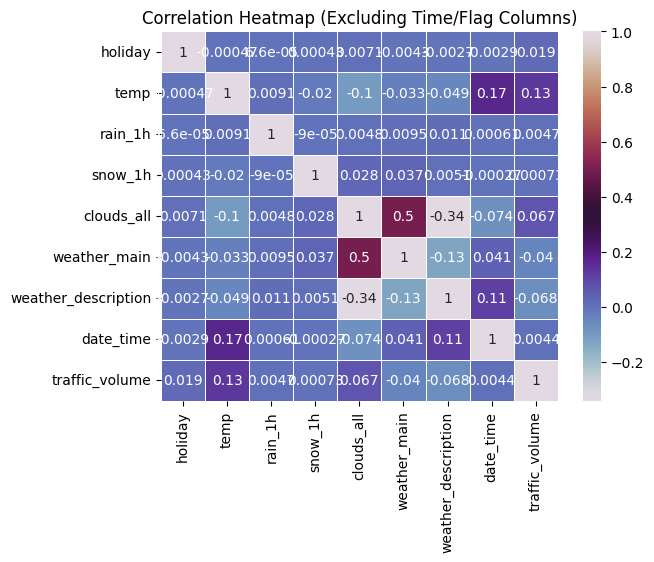

In [33]:
# List of columns to exclude
exclude_cols = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'is_weekend', 'is_rush_hour']

# Select only the columns to include in correlation
corr_cols = df.drop(columns=exclude_cols)

# Calculate correlation
corr = corr_cols.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='twilight')
plt.title("Correlation Heatmap (Excluding Time/Flag Columns)")
plt.show()

# Data Distribution

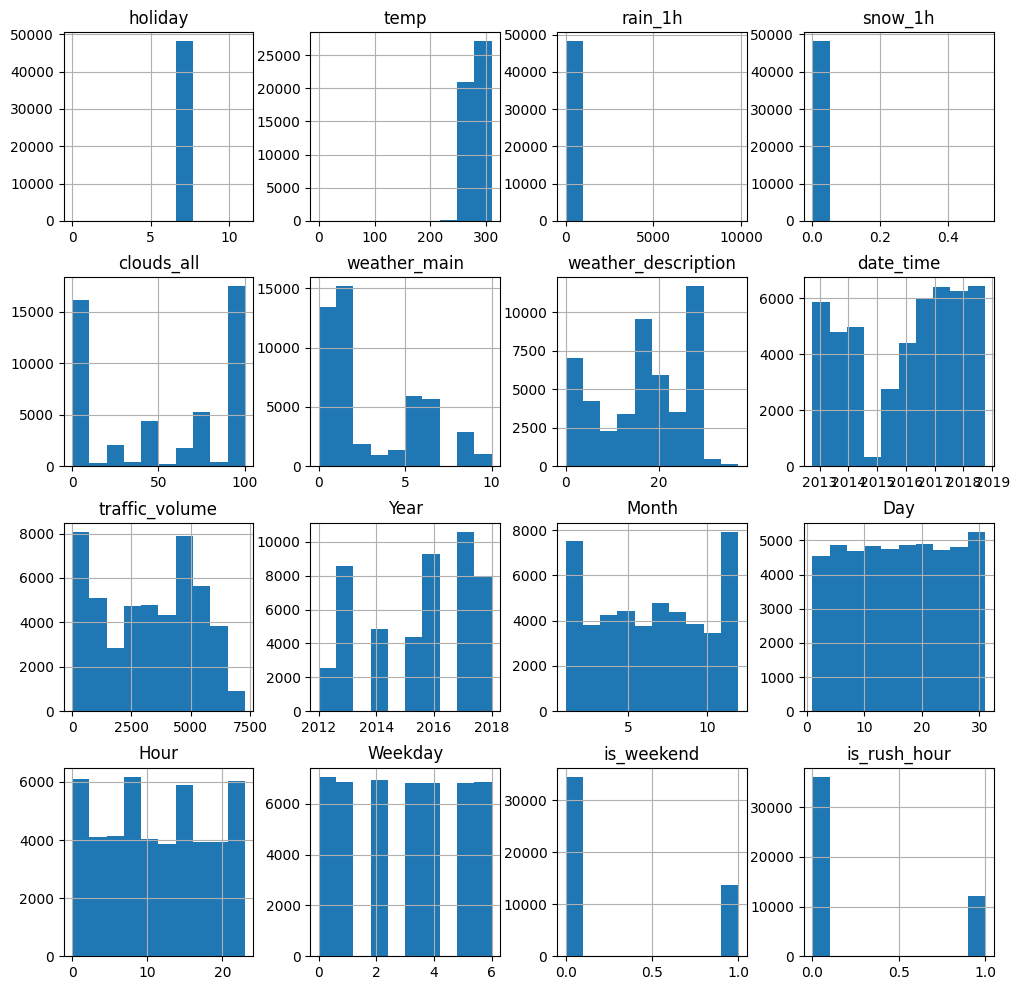

In [37]:
df.hist(figsize=(12,12))
plt.show()

# Outliers

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")

holiday: 61 outliers
temp: 10 outliers
rain_1h: 3467 outliers
snow_1h: 63 outliers
clouds_all: 0 outliers
weather_main: 0 outliers
weather_description: 0 outliers
traffic_volume: 0 outliers
Year: 0 outliers
Month: 0 outliers
Day: 0 outliers
Hour: 0 outliers
Weekday: 0 outliers
is_weekend: 0 outliers
is_rush_hour: 0 outliers


<Axes: xlabel='holiday', ylabel='Count'>

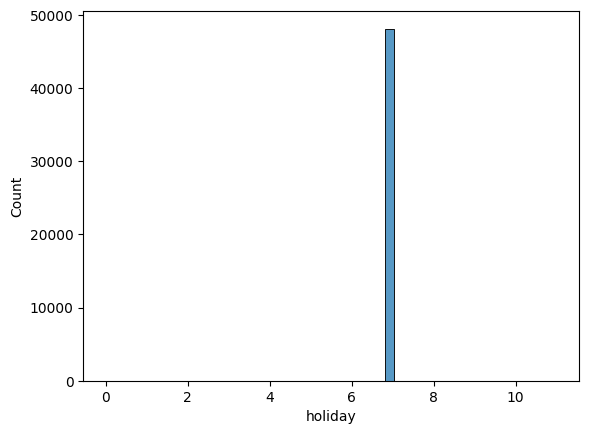

In [46]:
sns.histplot(df['holiday'], bins=50)

One massive spike around label 7 ('None'), all others are tiny.

No need to treat outliers because most days aren’t holidays. The rare values are real holidays, not errors.

<Axes: xlabel='temp', ylabel='Count'>

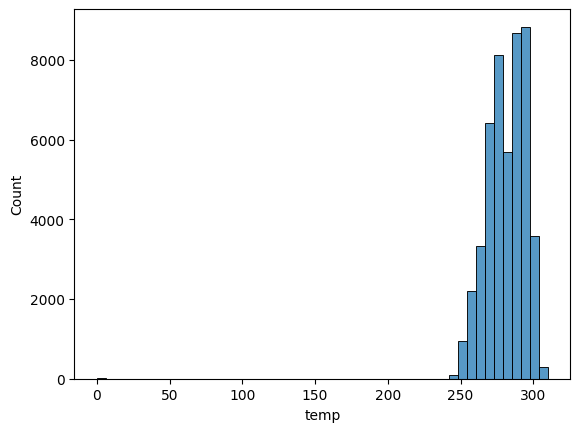

In [43]:
sns.histplot(df['temp'], bins=50)

Clipping the temp slightly to reduce outliers for KNN and Linear Regression.

In [47]:
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['temp'] = df['temp'].clip(lower, upper)

<Axes: xlabel='rain_1h', ylabel='Count'>

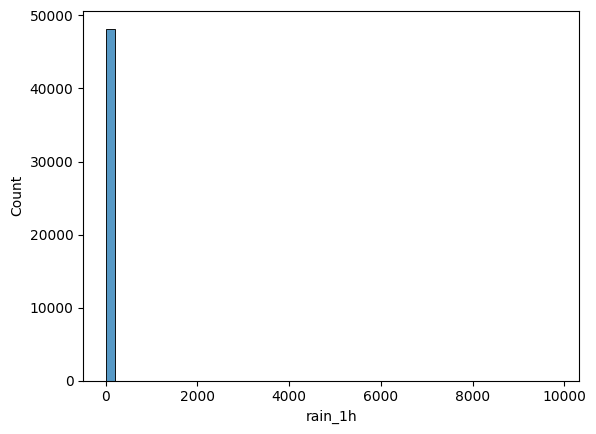

In [41]:
sns.histplot(df['rain_1h'], bins=50)

<Axes: xlabel='snow_1h', ylabel='Count'>

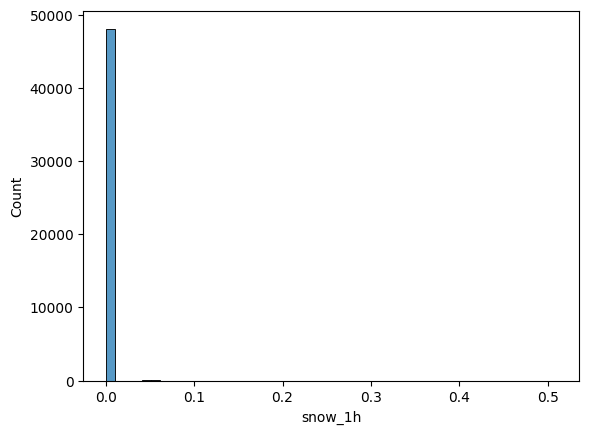

In [44]:
sns.histplot(df['snow_1h'], bins=50)

Both rain_1h and snow_1h are right skewed. 

Applying log transformation because there is a long spike at 0 and there be at least one row with rain near 9000 and snow near 0.4 → and that's what causes the x-axis to stretch so far 

In [49]:
import numpy as np

df['rain_1h_log'] = np.log1p(df['rain_1h']) 
df['snow_1h_log'] = np.log1p(df['snow_1h']) 

In [50]:
df.to_csv("cleaned_traffic_data.csv", index=False)